This notebook is used for creating a new csv file with all recordings, with processed accelerometer values for raw, standardised and normalised versions. 

The standardised and normalised versions only contain accel_magnitude and accel_pca.

In [12]:
import sys
sys.path.append('..')

from utils.constants import *
from utils.file_readers import *
from utils.data_exploration import *
from utils.signal_processing import *

from sklearn.preprocessing import StandardScaler, MinMaxScaler

We should save all the data in one csv - unnormalised axes, standardised per subject, normalised per activity. 

The column codes are the following:
- accel_{x} -> original
- accel_{x}_standardised -> mean 0 and unit variance per subject
- accel_{x}_normalised -> squashed between 0-1 for all subjects

In [13]:
df_all_final = read_all_files()

100%|██████████| 306/306 [00:21<00:00, 14.54it/s]


Remove outliers for x, y, z for each avtivity. The means and std per activity can be saved and ported to the android app.

In [14]:
means_by_act = {}
std_by_act = {}

for i in range(10):
    means_by_act[i] = []
    std_by_act[i] = []
    
idx_to_exclude_list = set()
total_idx_to_exclude = []
og_len = len(df_all_final)
print("Original length = {}".format(len(df_all_final)))
num_outliers = 0
for correctness in ['correct', 'incorrect']:
    print("Correctness = {}".format(correctness))
    for activity in range(10):
        print("Activity = {}".format(activity))

        for col in ['accel_x', 'accel_y', 'accel_z']:
            print("Axis = {}".format(col))
            mask = (df_all_final['correctness'] == correctness) & (df_all_final['activity'] == activity)
        
            mean = df_all_final[mask][col].mean()
            std = df_all_final[mask][col].std()
            print("Mean = {}, std = {}".format(mean, std))
            
            means_by_act[activity].append(mean)
            std_by_act[activity].append(std)
            
            mask_outlier = (df_all_final[mask][col] >= mean - 3*std) & (df_all_final[mask][col] <= mean + 3*std)
            og_len = len(df_all_final[mask])
            initial_idx = set(df_all_final.index[mask].tolist())
            idx_remaining = set(df_all_final.index[mask & mask_outlier].tolist())
            print("Idx to remove = {}".format(initial_idx - idx_remaining))
            
            idx_to_exclude_list = idx_to_exclude_list.union(initial_idx - idx_remaining)
            total_idx_to_exclude.extend(list(initial_idx - idx_remaining))

            new_len = len(df_all_final[mask & mask_outlier])
            num_outliers += og_len - new_len
            print("Removed {} outliers".format(og_len - new_len))
print("Outliers removed = {}".format(num_outliers))

Original length = 126467
Correctness = correct
Activity = 0
Axis = accel_x
Mean = -0.17593177422390882, std = 0.2988934751418381
Idx to remove = {61056, 77313, 77314, 47874, 53895, 47626, 117779, 117780, 117909, 47535, 47793, 47929, 60992, 47820, 37458, 117858, 61284, 118117, 37351, 61417, 61419, 61177, 118013}
Removed 23 outliers
Axis = accel_y
Mean = -0.8557454957411074, std = 0.20692104531071004
Idx to remove = {77313, 77314, 47626, 27660, 27661, 12316, 47646, 47647, 47648, 47649, 47650, 47651, 47652, 47653, 27681, 96803, 47681, 12371, 47701, 47702, 96857, 47706, 47707, 47708, 47709, 112232, 27767, 47737, 102522, 47761, 47762, 47763, 47764, 61083, 27809, 27810, 27811, 47793, 27832, 12482, 76995, 47814, 47815, 47816, 47817, 47818, 47819, 47820, 27852, 112356, 27877, 47849, 77036, 61177, 27898, 47872, 47873, 47874, 47875, 47924, 47925, 47926, 47927, 47928, 47929, 77117, 47422, 77137, 47955, 77157, 47475, 47476, 27512, 61310, 27533, 47505, 96661, 96662, 27551, 47527, 47528, 47529, 4753

Removed 103 outliers
Axis = accel_z
Mean = 0.02120549128865384, std = 0.19203241243815716
Idx to remove = {55554, 55684, 55814, 55562, 28173, 28174, 55700, 71835, 95777, 38050, 112034, 55716, 28070, 55603, 55731, 111929, 28096, 55619, 55748, 112080, 111955, 111959, 28121, 112094, 55781, 111983, 28147, 55668, 38005, 55545}
Removed 30 outliers
Activity = 9
Axis = accel_x
Mean = 0.08206696311188016, std = 0.2551794572061141
Idx to remove = {94729, 94743, 11800, 94744, 22048, 11814, 11564, 22062, 11698, 116662, 94651, 11836, 11588, 71239, 11852, 102099, 111188, 11866, 116829, 11498, 11757, 71021}
Removed 22 outliers
Axis = accel_y
Mean = -0.9569283477272728, std = 0.22804090329591498
Idx to remove = {28289, 116738, 116753, 28562, 111252, 28313, 28442, 116890, 28445, 28449, 28452, 28201, 28330, 101933, 102064, 28464, 28340, 22068, 28343, 28216, 28476, 28353, 11845, 28496, 28244, 28503, 111195, 28258, 102130, 101878}
Removed 30 outliers
Axis = accel_z
Mean = -0.053031984527272716, std = 0.19

Removed 266 outliers
Activity = 4
Axis = accel_x
Mean = 0.15829884931793237, std = 0.17702909429772204
Idx to remove = {17720, 31976, 31451}
Removed 3 outliers
Axis = accel_y
Mean = -0.9469477903088704, std = 0.049870238311699185
Idx to remove = {50179, 65542, 65543, 31503, 75024, 31769, 31770, 32027, 32028, 32030, 31781, 31785, 32177, 32178, 32179, 65972, 31796, 17722, 17727, 17728, 17729, 31686, 31571, 31572, 31573, 31450, 31451, 31965, 31966, 31976, 31978, 32124, 31869}
Removed 33 outliers
Axis = accel_z
Mean = -0.13900591297383538, std = 0.16092405798781176
Idx to remove = {31976, 31502, 31572, 32026, 32027}
Removed 5 outliers
Activity = 5
Axis = accel_x
Mean = 0.15530506515425985, std = 0.19830457583384473
Idx to remove = {30555, 30651, 64206, 64270}
Removed 4 outliers
Axis = accel_y
Mean = -0.9454398367335347, std = 0.0657138103510332
Idx to remove = {30208, 30468, 30469, 30470, 30087, 30088, 30344, 64268, 30478, 30480, 30610, 109333, 30613, 52119, 30104, 30745, 30490, 30746, 307

In [15]:
all_indices = set(df_all_final.index.tolist())
remaining_indices = all_indices - idx_to_exclude_list
print("Initial length = {}".format(len(df_all_final)))
df_all_final = df_all_final.iloc[list(remaining_indices)]
print("Length after outlier removal = {}".format(len(df_all_final)))

df_all_final.reset_index(drop=True, inplace=True)

Initial length = 126467
Length after outlier removal = 123962


Scale all recordings for each subject, for each activity, for each type of correctness.

In [16]:
df_all_final['accel_x_standardised'] = 0
df_all_final['accel_y_standardised'] = 0
df_all_final['accel_z_standardised'] = 0
df_all_final['accel_magnitude_standardised'] = 0
df_all_final['accel_pca_standardised'] = 0

subjects = get_subject_names()

for correctness in ['correct', 'incorrect']:
    
    # filter by correctness
    mask_df_cor = df_all_final['correctness'] == correctness
    df_cor = df_all_final[mask_df_cor]
    print("Correctness = {}\t\tSamples = {}".format(correctness, len(df_cor)))
    
    
    for activity in range(10):
        
        # filter by act
        mask_act = df_cor['activity'] == activity
        df_act = df_cor[mask_act]
        print("Activity = {}\t\tSamples = {}".format(activity, len(df_act)))
        
        for subject in subjects:
            
            # filter by subject
            mask_subj = df_act['subject'] == subject
            df_subj = df_act[mask_subj]
            print("Subject = {}\t\tSamples = {}".format(subject, len(df_subj)))
            
            scaler = StandardScaler()
            scaler.fit(df_subj[['accel_x', 'accel_y', 'accel_z', 'accel_magnitude', 'accel_pca']])
            new_vals = scaler.transform(df_subj[['accel_x', 'accel_y', 'accel_z', 'accel_magnitude', 'accel_pca']])
            
            final_mask = mask_df_cor & (df_all_final['activity'] == activity) & (df_all_final['subject'] == subject)
            df_all_final.loc[final_mask, 'accel_x_standardised'] = new_vals[:, 0]
            df_all_final.loc[final_mask, 'accel_z_standardised'] = new_vals[:, 1]
            df_all_final.loc[final_mask, 'accel_y_standardised'] = new_vals[:, 2]
            df_all_final.loc[final_mask, 'accel_magnitude_standardised'] = new_vals[:, 3]
            df_all_final.loc[final_mask, 'accel_pca_standardised'] = new_vals[:, 4]

Correctness = correct		Samples = 48417
Activity = 0		Samples = 7539
Subject = adela		Samples = 485
Subject = aggie		Samples = 378
Subject = andrius		Samples = 579
Subject = diana		Samples = 584
Subject = jack		Samples = 609
Subject = joao		Samples = 372
Subject = lukasz		Samples = 546
Subject = nikita		Samples = 419
Subject = rim		Samples = 427
Subject = ron		Samples = 545
Subject = santi		Samples = 390
Subject = seb		Samples = 515
Subject = sharan		Samples = 730
Subject = teo		Samples = 525
Subject = zoe		Samples = 435
Activity = 1		Samples = 3657
Subject = adela		Samples = 304
Subject = aggie		Samples = 136
Subject = andrius		Samples = 220
Subject = diana		Samples = 272
Subject = jack		Samples = 300
Subject = joao		Samples = 198
Subject = lukasz		Samples = 185
Subject = nikita		Samples = 210
Subject = rim		Samples = 233
Subject = ron		Samples = 310
Subject = santi		Samples = 222
Subject = seb		Samples = 330
Subject = sharan		Samples = 304
Subject = teo		Samples = 218
Subject = zoe		S

Subject = zoe		Samples = 398
Activity = 7		Samples = 5466
Subject = adela		Samples = 489
Subject = aggie		Samples = 370
Subject = andrius		Samples = 575
Subject = diana		Samples = 410
Subject = jack		Samples = 385
Subject = joao		Samples = 272
Subject = lukasz		Samples = 350
Subject = nikita		Samples = 46
Subject = rim		Samples = 534
Subject = ron		Samples = 515
Subject = santi		Samples = 240
Subject = seb		Samples = 270
Subject = sharan		Samples = 395
Subject = teo		Samples = 330
Subject = zoe		Samples = 285
Activity = 8		Samples = 8747
Subject = adela		Samples = 656
Subject = aggie		Samples = 558
Subject = andrius		Samples = 712
Subject = diana		Samples = 600
Subject = jack		Samples = 599
Subject = joao		Samples = 335
Subject = lukasz		Samples = 516
Subject = nikita		Samples = 587
Subject = rim		Samples = 812
Subject = ron		Samples = 895
Subject = santi		Samples = 455
Subject = seb		Samples = 424
Subject = sharan		Samples = 614
Subject = teo		Samples = 555
Subject = zoe		Samples = 42

In [17]:
df_all_final.head(5)

,timestamp,seq,accel_x,accel_y,accel_z,accel_magnitude,accel_pca,accel_x_smooth,accel_x_lp,accel_x_hp,...,accel_pca_grad,accel_pca_doublegrad,subject,activity,correctness,accel_x_standardised,accel_y_standardised,accel_z_standardised,accel_magnitude_standardised,accel_pca_standardised
0,1575566873410,0,-0.041016,-0.967773,0.093750,0.973168,0.014811,-0.012500,-0.013434,0.019851,...,-0.057875,0.024788,ron,6,correct,0.777790,0.814807,1.258093,-1.485756,0.113420
1,1575566873411,2,-0.044922,-1.047852,0.014648,1.048916,-0.043064,-0.012500,-0.012537,0.010087,...,-0.033087,0.010833,ron,6,correct,0.734308,0.022652,-3.324592,2.053471,-0.329780
2,1575566873412,4,-0.027344,-0.976562,0.017578,0.977103,-0.051363,-0.013086,-0.010840,0.022161,...,-0.036210,0.004900,ron,6,correct,0.929975,0.051992,0.755116,-1.301901,-0.393329
3,1575566873412,6,0.016602,-1.014648,-0.028320,1.015179,-0.115484,-0.009961,-0.008913,0.061264,...,-0.023286,0.028667,ron,6,correct,1.419143,-0.407653,-1.424451,0.477150,-0.884362
4,1575566873413,8,-0.015625,-1.026367,-0.033203,1.027023,-0.097935,-0.009766,-0.007282,0.025163,...,0.021125,-0.004218,ron,6,correct,1.060420,-0.456552,-2.095090,1.030531,-0.749973


Text(0.5, 1.0, 'PCA before standardisation')

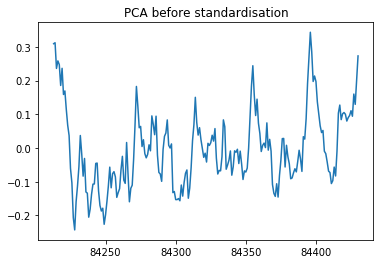

In [22]:
mask = (df_all_final['subject'] == 'teo') & (df_all_final['activity'] == 1) & (df_all_final['correctness'] == 'correct')
plt.plot(df_all_final[mask]['accel_pca'])
plt.title("PCA before standardisation")

Text(0.5, 1.0, 'PCA after standardisation')

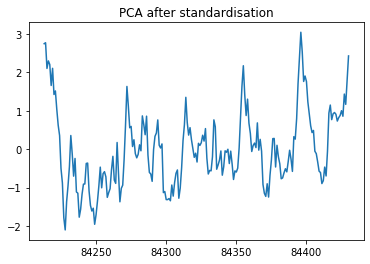

In [24]:
plt.plot(df_all_final[mask]['accel_pca_standardised'])
plt.title("PCA after standardisation")

Normalise data for all subjects, per each activity

In [25]:
df_all_final['accel_x_normalised'] = 0
df_all_final['accel_y_normalised'] = 0
df_all_final['accel_z_normalised'] = 0
df_all_final['accel_magnitude_normalised'] = 0
df_all_final['accel_pca_normalised'] = 0

for correctness in ['correct', 'incorrect']:
    
    # filter by correctness
    mask_df_cor = df_all_final['correctness'] == correctness
    df_cor = df_all_final[mask_df_cor]
    print("Correctness = {}\t\tSamples = {}".format(correctness, len(df_cor)))
    
    
    for activity in range(10):
        
        # filter by act
        mask_act = df_cor['activity'] == activity
        df_act = df_cor[mask_act]
        print("Activity = {}\t\tSamples = {}".format(activity, len(df_act)))
        
        scaler = MinMaxScaler()
        scaler.fit(df_act[['accel_x_standardised', 'accel_y_standardised', 'accel_z_standardised', 'accel_magnitude_standardised', 'accel_pca_standardised']])
        new_vals = scaler.transform(df_act[['accel_x_standardised', 'accel_y_standardised', 'accel_z_standardised', 'accel_magnitude_standardised', 'accel_pca_standardised']])
        
        final_mask = mask_df_cor & mask_act
        df_all_final.loc[final_mask, 'accel_x_normalised'] = new_vals[:, 0]
        df_all_final.loc[final_mask, 'accel_y_normalised'] = new_vals[:, 1]
        df_all_final.loc[final_mask, 'accel_z_normalised'] = new_vals[:, 2]
        df_all_final.loc[final_mask, 'accel_magnitude_normalised'] = new_vals[:, 3]
        df_all_final.loc[final_mask, 'accel_pca_normalised'] = new_vals[:, 4]

Correctness = correct		Samples = 48417
Activity = 0		Samples = 7539
Activity = 1		Samples = 3657
Activity = 2		Samples = 5244
Activity = 3		Samples = 3768
Activity = 4		Samples = 4657
Activity = 5		Samples = 5923
Activity = 6		Samples = 4460
Activity = 7		Samples = 3351
Activity = 8		Samples = 5052
Activity = 9		Samples = 4766
Correctness = incorrect		Samples = 75545
Activity = 0		Samples = 11511
Activity = 1		Samples = 6511
Activity = 2		Samples = 8275
Activity = 3		Samples = 5825
Activity = 4		Samples = 7799
Activity = 5		Samples = 8204
Activity = 6		Samples = 7943
Activity = 7		Samples = 5466
Activity = 8		Samples = 8747
Activity = 9		Samples = 5264


In [26]:
df_all_final.head(5)

,timestamp,seq,accel_x,accel_y,accel_z,accel_magnitude,accel_pca,accel_x_smooth,accel_x_lp,accel_x_hp,...,accel_x_standardised,accel_y_standardised,accel_z_standardised,accel_magnitude_standardised,accel_pca_standardised,accel_x_normalised,accel_y_normalised,accel_z_normalised,accel_magnitude_normalised,accel_pca_normalised
0,1575566873410,0,-0.041016,-0.967773,0.093750,0.973168,0.014811,-0.012500,-0.013434,0.019851,...,0.777790,0.814807,1.258093,-1.485756,0.113420,0.627260,0.638690,0.615543,0.390458,0.406359
1,1575566873411,2,-0.044922,-1.047852,0.014648,1.048916,-0.043064,-0.012500,-0.012537,0.010087,...,0.734308,0.022652,-3.324592,2.053471,-0.329780,0.620848,0.493956,0.208490,0.742347,0.320189
2,1575566873412,4,-0.027344,-0.976562,0.017578,0.977103,-0.051363,-0.013086,-0.010840,0.022161,...,0.929975,0.051992,0.755116,-1.301901,-0.393329,0.649703,0.499317,0.570867,0.408738,0.307834
3,1575566873412,6,0.016602,-1.014648,-0.028320,1.015179,-0.115484,-0.009961,-0.008913,0.061264,...,1.419143,-0.407653,-1.424451,0.477150,-0.884362,0.721840,0.415335,0.377269,0.585621,0.212364
4,1575566873413,8,-0.015625,-1.026367,-0.033203,1.027023,-0.097935,-0.009766,-0.007282,0.025163,...,1.060420,-0.456552,-2.095090,1.030531,-0.749973,0.668939,0.406401,0.317700,0.640641,0.238493


Text(0.5, 1.0, 'Magnitude before normalisation')

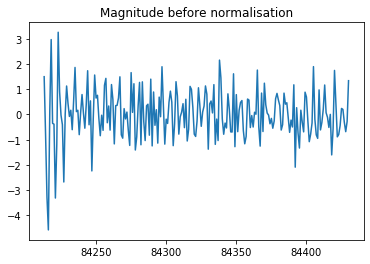

In [30]:
mask = (df_all_final['subject'] == 'teo') & (df_all_final['activity'] == 1) & (df_all_final['correctness'] == 'correct')
plt.plot(df_all_final[mask]['accel_magnitude_standardised'])
plt.title("Magnitude before normalisation")

Text(0.5, 1.0, 'Magnitude after normalisation')

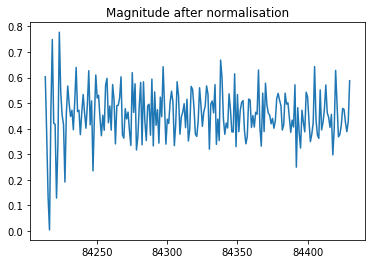

In [31]:
plt.plot(df_all_final[mask]['accel_magnitude_normalised'])
plt.title("Magnitude after normalisation")

In [32]:
df_all_final.to_csv("../Preprocessed/all_data.csv", index=False)